## Constant bidding

In [2]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [10]:
train = pd.read_csv('./we_data/train.csv')
validation = pd.read_csv('./we_data/validation.csv')

In [37]:
test = pd.read_csv('./we_data/test.csv')

In [38]:
test.shape

(303375, 22)

In [11]:
train.head(3)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"


In [4]:
# train.columns

In [3]:
# validation.columns

In [76]:
# validation.head()

In [136]:
validation.shape

(303925, 25)

In [141]:
def constant_bidding(constant):
    impression = 0.0; clicks = 0
    cost = 0.0; budget = 6250000
        
    for click, pay_price in validation[['click','payprice']].values:
        if constant > pay_price:
            impression += 1
            clicks += click
            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost

In [142]:
const = pd.DataFrame()
const['constants'] = np.arange(1,302,10)

im = []
clks = []
ct = []
for con in const['constants']:
    print('const', con)
    [imps, clicks, cost] = constant_bidding(con)
    im.append(imps)
    clks.append(clicks)
    ct.append(cost)
const['imps_won'] = im
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = ct
const['clicks'] = clks
const['CTR'] = (const.clicks/const.imps_won * 100).round(4).astype(str)
const['CPM'] = (const.total_spend/const.imps_won * 1000).round(2).astype(str)
const['CPC'] = (const.total_spend/const.clicks).round(2).astype(str)

1
11


KeyboardInterrupt: 

In [139]:
# optimal bidding price; for max clicks
const.constants[(const.clicks).idxmax()]

71

Text(0,0.5,'clicks')

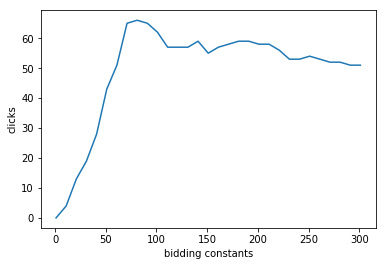

In [130]:
z = const[['clicks','constants']]

fig, ax1 = plt.subplots()
ax1.plot(z.constants,z.clicks)
ax1.set_xlabel('bidding constants')
ax1.set_ylabel('clicks', )

### Using validation set

[Text(0.5,0,'Constant bidding price')]

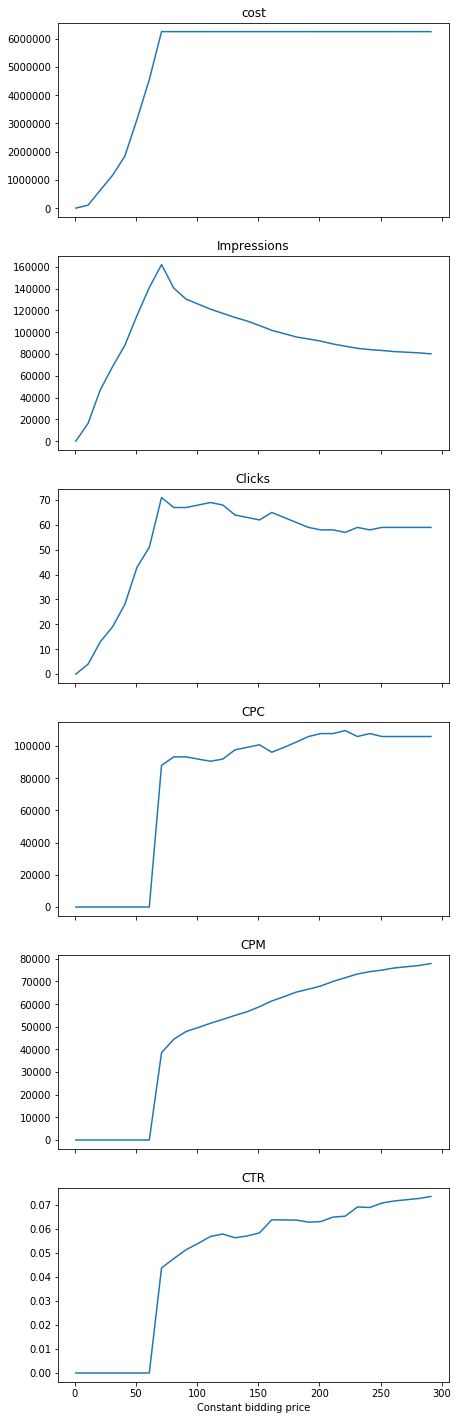

In [16]:
const = pd.DataFrame()
const['constants'] = np.arange(1,301, 10)

impression_list = []
click_list = []
cost_list = []
CPC_list = []; CPM_list = []; CTR_list = []

# shuffle training set
# validation_shuffle = validation.sample(frac=1, random_state = 12).reset_index(drop=True)

for c in const['constants']:
    [impression, click, cost, CPC, CPM, CTR] = constant_bidding(c, validation_shuffle)
    impression_list.append(impression)
    click_list.append(click)
    cost_list.append(cost)
    CPC_list.append(CPC)
    CPM_list.append(CPM)
    CTR_list.append(CTR)
    
    
const['imps_won'] = impression_list
const.imps_won = const.imps_won.astype(int)
const['total_spend'] = cost_list
const['clicks'] = click_list

const['CTR'] = CTR_list
const['CPM'] = CPM_list
const['CPC'] = CPC_list


# draw graph - validation set
metrics = [const.total_spend, const.imps_won, const.clicks, const.CPC, const.CPM, const.CTR,]
metricNames = ['cost', 'Impressions','Clicks','CPC','CPM','CTR']

f, axarr = plt.subplots(len(metrics), sharex=True, figsize=(7, 25))

i=0
for metric in metrics:
    axarr[i].plot(const['constants'] , metric)
    axarr[i].set_title(metricNames[i])
    i += 1

axarr[i-1].set(xlabel="Constant bidding price")

In [132]:
# shuffle validation set
# validation_shuffle = validation.sample(frac=1, random_state = 12).reset_index(drop=True)
# [impression, click, cost, CPC, CPM, CTR] = constant_bidding( validation)

In [19]:
# optimal bidding price; for max click
const.constants[(const.clicks).idxmax()]

71

In [20]:
# impression
const.imps_won[(const.clicks).idxmax()]

162136

In [21]:
# CTR
const.CTR[(const.clicks).idxmax()]

0.04379039818424039

In [22]:
# CPM
const.CPM[(const.clicks).idxmax()]

38548.08309073863

In [23]:
# CPC
const.CPC[(const.clicks).idxmax()]

88028.61971830986

## Random bidding

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [43]:
test.shape, validation.shape

((303375, 22), (303925, 25))

In [44]:
# set bidding range: 0 -> 300
minBid = train['payprice'].min()
maxBid = train['payprice'].max()

minBid, maxBid

(0, 300)

In [45]:
# doing
def singleAgent_randomBiding(df, lower_bound, upper_bound, budget=6250*1000, num=1):
    N =  df.shape[0]
    bid = pd.Series(np.random.randint(lower_bound, upper_bound, N))
    df = df[['bidid', 'payprice', 'click']][df['payprice'] <= bid].copy()

    results = np.zeros((num, 6))
    for i in range(num):
        # reshuffle data
        df = df.sample(frac=1)
        
        df['total_spend'] = df['payprice'].cumsum() # cumulative spending        
        
        # if within budget
        final_df = df[df['total_spend'] <= budget]
        click = final_df['click'].sum()
        impression = final_df['bidid'].count()
        totalCPM = final_df['payprice'].sum()
        spend = totalCPM / 1000

        if impression > 0:
            CTR = click / impression
            CPM = totalCPM / impression
        else:
            CTR = np.NaN
            CPM = np.NaN

        if click > 0:
            CPC = spend / click
        else:
            CPC = np.NaN
        
        results[i,:] = np.array([spend, impression, click, CTR, CPM, CPC])
        
    res = np.mean(results, axis=0)
    
    # unpack result
    spend, imp, click, CTR, CPM, CPC = res.T
    return spend, imp, click, CTR, CPM, CPC

In [46]:
spend, imp, click, ctr, cpm, cpc = singleAgent_randomBiding(train, minBid, maxBid )

In [23]:
metric = []
step = 20
a = range(minBid, maxBid+1, step) # 0 - 300
b = range(minBid, maxBid+1, step)

for lower in a:
    print(lower)
    
    for upper in b:
        if upper > lower:
            spend, imp, click, ctr, cpm, cpc = singleAgent_randomBiding(train, lower, upper)
            metric.append(np.hstack((lower, upper, click)))
            
metric = pd.DataFrame(metric, columns=['lower','upper', 'click'])

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300


In [28]:
metric[50:80]

,lower,upper,click
50,60.0,240.0,67.0
51,60.0,260.0,67.0
52,60.0,280.0,68.0
53,60.0,300.0,58.0
54,80.0,100.0,67.0
55,80.0,120.0,77.0
56,80.0,140.0,82.0
57,80.0,160.0,74.0
58,80.0,180.0,63.0
59,80.0,200.0,66.0


In [32]:
lower_series = metric.lower
upper_series = metric.upper
click_series = metric.click

In [29]:
np.max(metric.click)

115.0

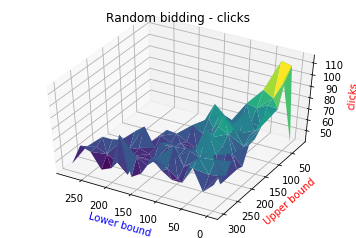

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(lower_series, upper_series, click_series,
                cmap='viridis', edgecolor='none')

ax.set_title('Random bidding - clicks')
ax.set_xlabel('Lower bound', color='b')
ax.set_ylabel('Upper bound', color='r')
ax.set_zlabel('clicks', color='r')
ax.view_init(45, 120)

testing on validation set - random bidding

In [35]:
spend, imp, click, ctr, cpm, cpc= singleAgent_randomBiding(validation, lower, upper,)

ValueError: low >= high

## Multiagent Random bidding

In [47]:
# doing multiagent
def multiagent_randomBidding(df, lower_bound, upper_bound, budget=6250*1000, num=1, agents=2):
    
    result = np.zeros((num, 6))
    N =  df.shape[0]
    
    # bidding agents
    for i in range(num):
        bid_self = np.random.randint(lower_bound, upper_bound, N)
        bid_others = np.random.randint(lower_bound, upper_bound, (N, agents)) # N个bid, 10*3的矩阵
        bid_other_max = np.max(bid_others, axis=1)
        bid_win = np.where(bid_self > bid_other_max, True, False)
        payprice = np.where(bid_win, bid_other_max, 0)
    
        df_winning = df[['bidid', 'click']][bid_win].copy()
        df_winning['payprice'] = payprice[bid_win]
        
        
        df_winning['total_spend'] = df_winning['payprice'].cumsum()
        final_df = df_winning[df_winning['total_spend'] <= budget]
        
        # stats
        click = final_df['click'].sum()
        impression = final_df['bidid'].count()
        totalCPM = final_df['payprice'].sum()
        spend = totalCPM / 1000

        if impression > 0:
            CTR = click / impression
            CPM = totalCPM / impression
        else:
            CTR = np.NaN
            CPM = np.NaN

        if click > 0:
            CPC = spend / click
        else:
            CPC = np.NaN
        
        result[i,:] = np.array([spend, impression, click, CTR, CPM, CPC])
        
    res = np.mean(result, axis=0)
    
    # unpack result
    spend, imp, click, CTR, CPM, CPC = res.T
    
    return spend, imp, click, CTR, CPM, CPC

In [92]:
f = pd.DataFrame(metric_multiagent, columns=['agent number' , 'imp','click','CTR' ]); f

,agent number,imp,click,CTR
0,50,1307.0,2.0,0.001530
1,53,1036.0,0.0,0.000000
2,56,908.0,0.0,0.000000
3,59,752.0,0.0,0.000000
4,62,686.0,2.0,0.002915
5,65,572.0,0.0,0.000000
6,68,473.0,0.0,0.000000
7,71,430.0,0.0,0.000000
8,74,320.0,0.0,0.000000
9,77,263.0,0.0,0.000000


In [93]:
# consider best bidding range for multiagents

minBid = 60
maxBid = 80

res_list = list()
for agent in range(50, 101, 10): # 101
    spend, imp, click, CTR, CPM, CPC = multiagent_randomBidding(train, minBid, maxBid, num=1, agents=agent)
    res_list.append(np.hstack((minBid, maxBid, agent, spend, imp, click, CTR, CPM, CPC)))
    print(agent)

res_df = pd.DataFrame(res_list, columns=['minBid', 'minBid', 'agents', 'spend', 'impression', 'click', 'CTR', 'CPM', 'CPC'])

50
60
70
80
90
100


Text(0,0.5,'clicks')

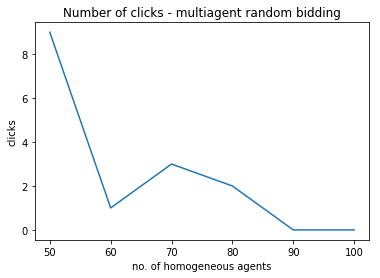

In [94]:
# Clicks
plt.plot( res_df.agents, res_df.click);
plt.title('Number of clicks - multiagent random bidding')
plt.xlabel('no. of homogeneous agents')
plt.ylabel('clicks')

Text(0,0.5,'clicks')

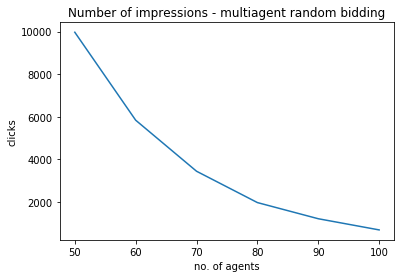

In [96]:
# Clicks
plt.plot( res_df.agents, res_df.impression);
plt.title('Number of impressions - multiagent random bidding')
plt.xlabel('no. of agents')
plt.ylabel('clicks')

# Q5: multiagent bidding - final

In [133]:
bidprice = pd.read_csv('./multi_bidprice_change_param.csv')

In [56]:
bidprice.shape, validation.shape

((303925, 9), (303925, 25))

In [57]:
validation.head(3)

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"


In [113]:
resultsBids=pd.DataFrame(index=range(validation.shape[0]))

# 从 validation
bidprice['click']=validation['click']
bidprice['payprice']=validation['payprice']

In [114]:
bidprice.head()

,LR_linear,RF_linear,XGB_linear,LR_quadratic,RF_quadratic,XGB_quadratic,LR_ORTB,RF_ORTB,XGB_ORTB,click,payprice
0,55.176850,48.053406,25.628753,32.216770,24.435237,6.950613,62.823551,57.625865,38.313333,0,23
1,25.667543,83.631096,18.952543,6.971669,74.012278,3.801046,38.352259,80.950362,31.174587,0,75
2,27.100368,48.053406,15.350596,7.771745,24.435237,2.493553,39.772333,57.625865,26.873727,0,65
3,29.847929,31.371260,14.806595,9.427501,10.414349,2.319950,42.405113,43.818019,26.189373,0,6
4,39.564984,15.366955,20.611810,16.564952,2.498871,4.495732,50.936638,26.894151,33.038612,0,5


In [60]:
# doing
def evaluate_rand_multiagent_modifying(df, df_other, self_team, budget=6250*1000, num=1, agents=2):
    
    result = np.zeros((num, 6))
    N =  df.shape[0]
    
    # bidding agents
    for i in range(num):
        bid_self = df[self_team].values # ???
        bid_other_max = np.max(df_other, axis=1)
        bid_other_max.sort_index(inplace=True)
        
        won = np.where(bid_self > bid_other_max, True, False)

        # if won, then pay bid other max; else pay 0
        payprice = np.where(won, bid_other_max, 0)
    
        df_winning = df_other[['click']][won].copy()
        df_winning 
        df_winning['payprice'] = payprice[won] # pay 2nd price
        
        
        df_winning['total_cost'] = df_winning['payprice'].cumsum()
        final_df = df_winning[df_winning['total_cost'] <= budget]
        
        # stats
        click = final_df['click'].sum()
        impression = final_df.shape[0]
        totalCPM = final_df['payprice'].sum()
        spend = totalCPM / 1000

        if impression > 0:
            CTR = click / impression
            CPM = totalCPM / impression
        else:
            CTR = np.NaN
            CPM = np.NaN

        if click > 0:
            CPC = spend / click
        else:
            CPC = np.NaN
        
        result[i,:] = np.array([spend, impression, click, CTR, CPM, CPC])
        
    res = np.mean(result, axis=0)
    
    # unpack result
    spend, imp, click, CTR, CPM, CPC = res.T
    
    return spend, imp, click, CTR, CPM, CPC

In [61]:
bidprice.head(3)

,LR_linear,RF_linear,XGB_linear,LR_quadratic,RF_quadratic,XGB_quadratic,LR_ORTB,RF_ORTB,XGB_ORTB,click,payprice
0,55.176850,48.053406,25.628753,32.216770,24.435237,6.950613,62.823551,57.625865,38.313333,0,23
1,25.667543,83.631096,18.952543,6.971669,74.012278,3.801046,38.352259,80.950362,31.174587,0,75
2,27.100368,48.053406,15.350596,7.771745,24.435237,2.493553,39.772333,57.625865,26.873727,0,65


In [126]:
# 思路一： 原始 bid price找最好的模型

click_list = []
teams = ['LR_linear', 'RF_linear', 'XGB_linear', 'LR_quadratic', 'RF_quadratic', 
         'XGB_quadratic', 'LR_ORTB', 'RF_ORTB', 'XGB_ORTB']

for team in teams: 
    
    # self and other
    df_self = bidprice[[team]]
    df_other = bidprice.drop(team, axis=1)
    
    spend, imp, click, CTR, CPM, CPC = evaluate_rand_multiagent_modifying(df_self, df_other, self_team=team, num=1)
    click_list.append([team , imp, click, CPM, CTR, CPC])
#     print('team=', team , ', click=', click, ', spend=', spend, ', ctr=', CTR)

In [127]:
pd.DataFrame( click_list , columns=['team name', 'impression', 'click','CPM', 'CTR' ,'CPC'], )

,team name,impression,click,CPM,CTR,CPC
0,LR_linear,11404.0,2.0,83.271185,0.000175,474.812297
1,RF_linear,9794.0,0.0,81.001131,0.000000,NaN
2,XGB_linear,3831.0,2.0,83.299208,0.000522,159.559633
3,LR_quadratic,5478.0,4.0,1140.900596,0.000730,1562.463366
4,RF_quadratic,5154.0,5.0,1211.950073,0.000970,1249.278135
5,XGB_quadratic,1211.0,6.0,5160.934368,0.004955,1041.648587
6,LR_ORTB,37692.0,1.0,55.676710,0.000027,2098.566541
7,RF_ORTB,18430.0,0.0,55.796579,0.000000,NaN
8,XGB_ORTB,15690.0,4.0,53.815242,0.000255,211.090288


In [178]:
# 思路2：保留最大的n 个bid, 其他设为0

N = 10 * 1000
test1 = bidprice.mask(bidprice.rank(axis=0, method='max', ascending=False) > N, 0)
test1.head(10)

,LR_linear,RF_linear,XGB_linear,LR_quadratic,RF_quadratic,XGB_quadratic,LR_ORTB,RF_ORTB,XGB_ORTB,click,payprice
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
4,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
5,4128.176563,0.0,0.0,180336.949559,0.0,0.0,675.485157,0.0,0.0,0,0
6,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
7,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0
9,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0


In [174]:
test2 = test1 / test1.sum() * 6500000
test2.head(10)

,LR_linear,RF_linear,XGB_linear,LR_quadratic,RF_quadratic,XGB_quadratic,LR_ORTB,RF_ORTB,XGB_ORTB,click,payprice
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,92.956724,76.162986,0.000000,2.493924,0.835220,0.000000,167.133541,147.809923,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,210.438005
4,0.000000,0.000000,73.423085,0.000000,0.000000,2.613352,0.000000,0.000000,141.138559,0.0,0.000000
5,1187.410787,0.000000,63.230006,406.933553,0.000000,1.938113,643.143049,0.000000,129.610035,0.0,199.309072
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,179.074649
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.000000,94.847312,0.000000,0.000000,1.295278,0.000000,0.000000,167.120344,0.000000,0.0,0.000000


In [136]:
bidprice.describe()

,LR_linear,RF_linear,XGB_linear,LR_quadratic,RF_quadratic,XGB_quadratic,LR_ORTB,RF_ORTB,XGB_ORTB,click,payprice
count,303925.000000,303925.000000,303925.000000,3.039250e+05,3.039250e+05,3.039250e+05,303925.000000,303925.000000,303925.000000,303925.000000,303925.000000
mean,131.016318,112.002324,98.677637,9.530429e+03,1.224680e+04,2.951271e+03,80.245547,72.449835,69.583920,0.000665,78.234005
std,939.927197,1069.944645,518.805080,1.002244e+06,1.777911e+06,1.396769e+05,75.427932,70.466556,62.667848,0.025772,60.026063
min,0.200073,0.000000,4.651855,4.235874e-04,0.000000e+00,2.289921e-01,0.577249,0.000000,10.734482,0.000000,0.000000
25%,36.412003,31.371260,25.713233,1.402999e+01,1.041435e+01,6.996512e+00,48.285258,43.818019,38.398075,0.000000,33.000000
50%,59.855050,48.053406,46.517395,3.791140e+01,2.443524e+01,2.289807e+01,66.066447,57.625865,56.458805,0.000000,68.000000
75%,100.585790,102.626745,81.429954,1.070635e+02,1.114524e+02,7.016759e+01,90.344546,91.421993,79.665844,0.000000,100.000000
max,161067.864584,170833.020636,52315.108707,2.745276e+08,3.088246e+08,2.896159e+07,4322.483175,4452.180676,2454.895324,1.000000,300.000000


In [115]:
rf_pctr.click_proba.describe()

count    303925.000000
mean          0.098192
std           0.100744
min           0.002415
25%           0.043971
50%           0.069958
75%           0.113124
max           0.979859
Name: click_proba, dtype: float64

In [126]:
rf_pctr[ rf_pctr.click_proba > .1 ].click_proba.sum()

18281.79584348607

In [12]:
# click_list = []

# for mul in lin: 
# #     print('Multiple = ', mul)
    
#     # 取一部分
#     subset = resultsBids.sample(frac=1, replace=False,).copy(True) #divided by 5
#     subset.reset_index(drop=True, inplace=True)
    
#     # self and other
#     df_self = subset[['BestLinear']] 
#     df_other1 = subset[['click', 'payprice', 'ConstantBidding', 'RandomBidding', 'xgb_lasso_Str2']]
    
    
#     df_other_combine = pd.concat([df_other1, df_other2], axis=1,)
    
#     spend, imp, click, CTR, CPM, CPC = evaluate_rand_multiagent_modifying(df_self, df_other1, num= 5)
#     print('click= ', click)
#     click_list.append(click)

In [3]:
test_set_pred = pd.read_csv('result_7.csv')

In [3]:
test_set_pred.shape

(303375, 2)

In [4]:
test_set_pred.head()

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,277.862730
1,29167d4caa719788b5a342dbaa25151d53121f80,2839.704000
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,6.452158
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,63.359745
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,55.147120


In [32]:
?test_set_20k_biggest.rank

In [75]:
test_set_20k_biggest.shape

(303375, 3)

In [ ]:
# N = 20*1000 # 20k biggest
test_set_20k_biggest = test_set_pred.mask(test_set_pred.rank(axis=0, method='min', ascending=False) < 20000, 0) # rank < 20k, set 12
# test_set_20k_biggest = test_set_pred.mask(test_set_pred.rank(axis=0, method='min', ascending=False) > N, ) # rank > 20k, set 12
# test_set_20k_biggest = test_set_20k_biggest.mask(test_set_pred.rank(axis=0, method='min', ascending=False) > 40000, 0) # rank > 20k, set 12

# test_set_20k_biggest.bidid = test_set_pred.bidid
test_set_20k_biggest.sum()

In [78]:
test_set_20k_biggest.bidid = test_set_pred.bidid

In [ ]:
len( test_set_20k_biggest.bidprice.nonzero()[0] )

In [58]:
test_set_20k_biggest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303375 entries, 0 to 303374
Data columns (total 3 columns):
Unnamed: 0    303375 non-null int64
bidid         303375 non-null object
bidprice      303375 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [55]:
# test_set_20k_biggest

In [8]:
test_set_20k_biggest.bidprice /= 7.5

In [9]:
test_set_20k_biggest.bidprice.sum()

65130014.02666667

In [ ]:
test_set_20k_biggest.sum()

In [11]:
test_set_20k_biggest.to_csv("test_set_60_biggest_scale.csv")